Este projeto vai usar um novo dataset que possui **quatro** colunas diferentes.
Cada item (ou cada linha) representa um usuário que acessou um determinado site. Neste site, temos três páginas diferentes: a "**home**" ("principal"); a "**how it works**" ("como_funciona"), que explica o funcionamento do site; e a "**contact**" ("contato"), para entrar em contato.
Cada uma dessas três columnas são as "**features**", que possuem o valor 1 ou 0, indicando se um usuário específico acessou essa página ou não, respectivamente.
Existe também uma quarta coluna ("**bought**"), indicando se esse usuário comprou o produto (1) ou não (0).

In [1]:
# importa a biblioteca Pandas e lê o dataset
import pandas as pd

uri = r"./CSVs/tracking.csv"
dados = pd.read_csv(uri)

#lista os 5 primeiros registros (linhas) do dataset
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [2]:
# os nomes das colunas estão em inglês. Então vamos alterar para português
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)

In [3]:
# separa as três primeiras colunas (as features)
x = dados[["principal","como_funciona","contato"]]
x.head()

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [4]:
# separa a última coluna (que será os "labels")
y = dados["comprou"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [5]:
dados.shape

(99, 4)

In [6]:
# precisamos separar os dados de treinamento dos dados de teste
# usaremos a proporção 75 para treinamento e 25 para teste.

treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print(f"Treinaremos com {len(treino_x)} elementos (registros) e testaremos com {len(teste_x)} elementos")

Treinaremos com 75 elementos (registros) e testaremos com 24 elementos


In [7]:
# vamos treinar o modelo
# e depois vamos calcular a taxa de acerto (i.e. acurácia)

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

A acurácia foi 95.83%


t:\GitHub\College_tasks\6_Sixth_semester\data_science_introduction\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# **Desafio**

Altere o algoritmo de ML para o de "Árvore de Decisão" usado na apresentação de Introdução ao ML.

Depois imprima a árvore de decisão


---



In [8]:
from sklearn import tree
from sklearn.metrics import accuracy_score

modelo = tree.DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi {acuracia:.2f}%")

A acurácia foi 95.83%


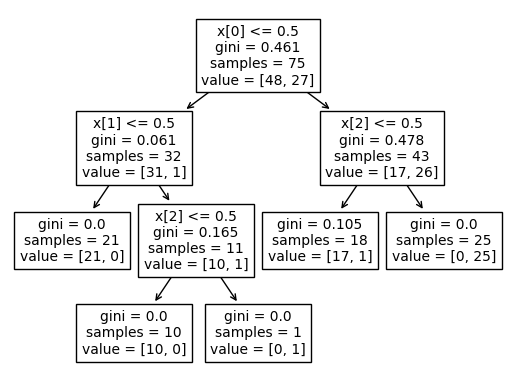

In [9]:
tree.plot_tree(modelo);